<a href="https://colab.research.google.com/github/Yamini584/Population-Clustering/blob/main/Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Practice/K-means example/Population_Data.csv')

In [182]:
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [184]:
df['Region'].unique()

array(['Region 31', 'Region 17', 'Region 12', 'Region 22', 'Region 23',
       'Region 20', 'Region 1', 'Region 24', 'Region 11', 'Region 4',
       'Region 37', 'Region 34', 'Region 18', 'Region 16', 'Region 25',
       'Region 33', 'Region 5', 'Region 26', 'Region 15', 'Region 13',
       'Region 21', 'Region 30', 'Region 9', 'Region 29', 'Region 19',
       'Region 10', 'Region 27', 'Region 8', 'Region 2', 'Region 38',
       'Region 36', 'Region 32', 'Region 6', 'Region 28', 'Region 7',
       'Region 35', 'Region 14', 'Region 3'], dtype=object)

In [185]:
import numpy as np
Regionclmn=[]
for i in list(df['Region'].unique()) :
  i=int(i[7:])
  Regionclmn.append(i)
df['Region']=np.array(Regionclmn,dtype=int)

In [186]:
df['Region'].unique()

array([31, 17, 12, 22, 23, 20,  1, 24, 11,  4, 37, 34, 18, 16, 25, 33,  5,
       26, 15, 13, 21, 30,  9, 29, 19, 10, 27,  8,  2, 38, 36, 32,  6, 28,
        7, 35, 14,  3])

In [187]:
commaclmns = ['Indians' ,'Foreigners','Indian_Male',	'Indian_Female' ,'Foreigners_Male','Foreigners_Female','Total Population']

In [188]:
for i in df[commaclmns]:
  df[i]=df[i].apply(lambda x : int(x.replace(',','')))

In [189]:
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,12,4,194379,650744,161803,32576,631660,10652,845123
3,22,15,107360,470708,85343,22017,450267,6389,578068
4,23,13,55351,329980,31796,23555,325105,3684,385331


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Region              38 non-null     int64
 1   Office Location Id  38 non-null     int64
 2   Indians             38 non-null     int64
 3   Foreigners          38 non-null     int64
 4   Indian_Male         38 non-null     int64
 5   Indian_Female       38 non-null     int64
 6   Foreigners_Male     38 non-null     int64
 7   Foreigners_Female   38 non-null     int64
 8   Total Population    38 non-null     int64
dtypes: int64(9)
memory usage: 2.8 KB


In [191]:
df['Indian_others'] = df['Indians'] - (df['Indian_Male'] + df['Indian_Female'])
df['Foriegner_others'] = df['Foreigners'] - (df['Foreigners_Male'] + df['Foreigners_Female'])
#df['Total_others'] = df['Total Population'] - (df['Indians'] + df['Foreigners']) = 0

In [192]:
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Indian_others,Foriegner_others
0,31,1,643596,2883782,440445,203151,2763718,72515,3527378,0,47549
1,17,9,319933,1501899,213477,106456,1449303,27671,1821832,0,24925
2,12,4,194379,650744,161803,32576,631660,10652,845123,0,8432
3,22,15,107360,470708,85343,22017,450267,6389,578068,0,14052
4,23,13,55351,329980,31796,23555,325105,3684,385331,0,1191


In [193]:
df.drop(columns=['Region','Office Location Id'],inplace=True)

In [194]:
df.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Indian_others,Foriegner_others
0,643596,2883782,440445,203151,2763718,72515,3527378,0,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,0,24925
2,194379,650744,161803,32576,631660,10652,845123,0,8432
3,107360,470708,85343,22017,450267,6389,578068,0,14052
4,55351,329980,31796,23555,325105,3684,385331,0,1191


Normalization

In [195]:
def percentage_converter(data, total, columns):
    '''
    expresses the other columns as percentage of the total column
    '''
    for i in columns:
        data[i] = data[i]/data['Total Population']
        
    return data.drop(columns=['Total Population'])
df = percentage_converter(df,'Total Population', df.drop(columns=['Total Population']).columns)

In [196]:
df.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Indian_others,Foriegner_others
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.0,0.013480
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.0,0.013681
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.0,0.009977
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.0,0.024309
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.0,0.003091


K-Means Clustering

In [197]:
from sklearn.cluster import KMeans
inertia = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster) #n_clusters - no. of clusters
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [198]:
frame = pd.DataFrame({'Cluster':range(1,10), 'Inertia':inertia}) #New dataframe

In [199]:
frame.head()

,Cluster,Inertia
0,1,0.158124
1,2,0.057986
2,3,0.036128
3,4,0.024685
4,5,0.019121


In [200]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cluster  9 non-null      int64  
 1   Inertia  9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 272.0 bytes


Text(0, 0.5, 'Inertia')

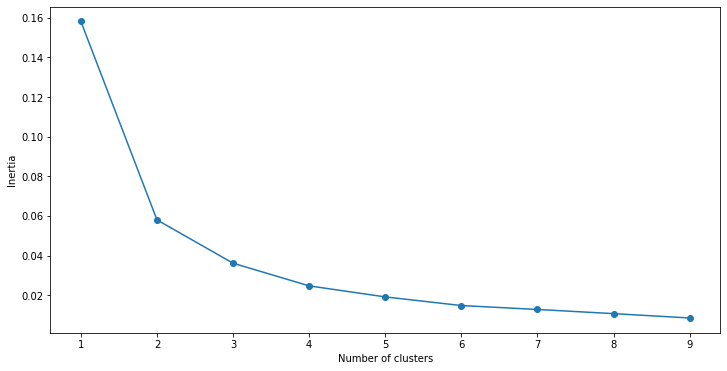

In [201]:
#Elbow curve
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [202]:
#K-Means = 2